In [1]:
# !pip install citipy

# WeatherPy

In [2]:
# import dependencies
from citipy import citipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import scipy.stats as sts
from datetime import date
from pprint import pprint
from IPython.display import Image 
from api_keys import (weather_api_key, g_key)

### Generate Cities List

In [3]:
np.random.seed(43)
df = pd.DataFrame({
    'ran_lat': np.random.uniform(-90.0, 90.0, 1300),
    'ran_lng': np.random.uniform(-180.0, 180.0, 1300)
})
df.head()

,ran_lat,ran_lng
0,-69.290178,139.634768
1,19.631977,16.982740
2,-65.989626,144.813200
3,-46.693868,-36.697486
4,-31.114970,12.965113


In [4]:
# define new empty columns
df['Name'] = ''
df['Country Code']= ''
df.head()

,ran_lat,ran_lng,Name,Country Code
0,-69.290178,139.634768,,
1,19.631977,16.982740,,
2,-65.989626,144.813200,,
3,-46.693868,-36.697486,,
4,-31.114970,12.965113,,


In [5]:
# check lat and lng for closest cities from citipy
for index, row in df.iterrows():
    df.loc[index, 'Name'] = citipy.nearest_city(row['ran_lat'], row['ran_lng']).city_name
    df.loc[index, 'Country Code'] = citipy.nearest_city(row['ran_lat'], row['ran_lng']).country_code
df.head()

,ran_lat,ran_lng,Name,Country Code
0,-69.290178,139.634768,hobart,au
1,19.631977,16.982740,faya,td
2,-65.989626,144.813200,hobart,au
3,-46.693868,-36.697486,chuy,uy
4,-31.114970,12.965113,oranjemund,na


In [6]:
# check number of unique cities
df['Name'].nunique()

578

In [7]:
cities_df = df.drop_duplicates(subset=['Name', 'Country Code'], keep ='first').reset_index(drop=True)
cities_df

,ran_lat,ran_lng,Name,Country Code
0,-69.290178,139.634768,hobart,au
1,19.631977,16.982740,faya,td
2,-46.693868,-36.697486,chuy,uy
3,-31.114970,12.965113,oranjemund,na
4,64.644748,-77.657177,iqaluit,ca
...,...,...,...,...
575,73.097869,67.075110,sovetskiy,ru
576,57.882536,-57.078282,saint anthony,ca
577,-2.255191,124.170870,luwuk,id
578,53.531936,107.864496,khuzhir,ru


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [8]:
units = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="
base_url = f"{url}"

cities_df['Temperature (F)'] = ''
cities_df['Humidity (%)'] = ''
cities_df['Cloudiness (%)'] = ''
cities_df['Wind Speed (mph)'] = ''
cities_df['lat'] = ''
cities_df['lng'] = ''


for index, row in cities_df.iterrows():
    query_url = f"{url}{row['Name']},{row['Country Code']}"
    response = requests.get(query_url).json()
    
    try:
        cities_df.loc[index, 'Temperature (F)'] = float(response['main']['temp_max'])
        cities_df.loc[index, 'Humidity (%)'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
        cities_df.loc[index, 'lat'] = response['coord']['lat']
        cities_df.loc[index, 'lng'] = response['coord']['lon']
        
        print(f"City {index+1} of {len(cities_df)} | {row['Name']} is being processed.")
    except:
        print(f"City {index+1} of {len(cities_df)} | {row['Name']} weather data could not be found. Skipping")

City 1 of 580 | hobart is being processed.
City 2 of 580 | faya weather data could not be found. Skipping
City 3 of 580 | chuy is being processed.
City 4 of 580 | oranjemund is being processed.
City 5 of 580 | iqaluit is being processed.
City 6 of 580 | ganganagar is being processed.
City 7 of 580 | vaitupu weather data could not be found. Skipping
City 8 of 580 | port alfred is being processed.
City 9 of 580 | jamestown is being processed.
City 10 of 580 | tevaitoa is being processed.
City 11 of 580 | bethel is being processed.
City 12 of 580 | jamestown is being processed.
City 13 of 580 | bredasdorp is being processed.
City 14 of 580 | igarka is being processed.
City 15 of 580 | dunedin is being processed.
City 16 of 580 | hithadhoo is being processed.
City 17 of 580 | vaini is being processed.
City 18 of 580 | ushuaia is being processed.
City 19 of 580 | kargasok is being processed.
City 20 of 580 | haines junction is being processed.
City 21 of 580 | tuktoyaktuk is being processed

City 168 of 580 | ribeira grande is being processed.
City 169 of 580 | lata weather data could not be found. Skipping
City 170 of 580 | halalo weather data could not be found. Skipping
City 171 of 580 | attawapiskat weather data could not be found. Skipping
City 172 of 580 | qaanaaq is being processed.
City 173 of 580 | quatre cocos is being processed.
City 174 of 580 | satipo is being processed.
City 175 of 580 | bandarban is being processed.
City 176 of 580 | souillac is being processed.
City 177 of 580 | belushya guba weather data could not be found. Skipping
City 178 of 580 | touros is being processed.
City 179 of 580 | pacific grove is being processed.
City 180 of 580 | laje is being processed.
City 181 of 580 | nikolayevsk-na-amure is being processed.
City 182 of 580 | moose factory is being processed.
City 183 of 580 | nome is being processed.
City 184 of 580 | bilma is being processed.
City 185 of 580 | mackenzie is being processed.
City 186 of 580 | san antonio sacatepequez is

City 333 of 580 | grand river south east weather data could not be found. Skipping
City 334 of 580 | mar del plata is being processed.
City 335 of 580 | apac is being processed.
City 336 of 580 | tungkang weather data could not be found. Skipping
City 337 of 580 | mount isa is being processed.
City 338 of 580 | bardsir is being processed.
City 339 of 580 | bouar is being processed.
City 340 of 580 | mezen is being processed.
City 341 of 580 | kilindoni is being processed.
City 342 of 580 | yangjiang is being processed.
City 343 of 580 | carnarvon is being processed.
City 344 of 580 | fukue is being processed.
City 345 of 580 | kodiak is being processed.
City 346 of 580 | karratha is being processed.
City 347 of 580 | husavik is being processed.
City 348 of 580 | zeya is being processed.
City 349 of 580 | nkayi is being processed.
City 350 of 580 | genhe is being processed.
City 351 of 580 | honningsvag is being processed.
City 352 of 580 | los llanos de aridane is being processed.
City

City 498 of 580 | baherden is being processed.
City 499 of 580 | hendijan weather data could not be found. Skipping
City 500 of 580 | caravelas is being processed.
City 501 of 580 | flin flon is being processed.
City 502 of 580 | searcy is being processed.
City 503 of 580 | kungurtug is being processed.
City 504 of 580 | kalutara is being processed.
City 505 of 580 | chippewa falls is being processed.
City 506 of 580 | ostrov is being processed.
City 507 of 580 | chilpancingo is being processed.
City 508 of 580 | rio grande is being processed.
City 509 of 580 | kathu is being processed.
City 510 of 580 | kysyl-syr is being processed.
City 511 of 580 | moron is being processed.
City 512 of 580 | san andres is being processed.
City 513 of 580 | aneho is being processed.
City 514 of 580 | poopo is being processed.
City 515 of 580 | atherton is being processed.
City 516 of 580 | frankfort is being processed.
City 517 of 580 | tapaua weather data could not be found. Skipping
City 518 of 580

In [9]:
cities_df

,ran_lat,ran_lng,Name,Country Code,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),lat,lng
0,-69.290178,139.634768,hobart,au,53.6,87,90,5.82,-42.88,147.33
1,19.631977,16.982740,faya,td,,,,,,
2,-46.693868,-36.697486,chuy,uy,55.08,59,69,13.44,-33.7,-53.46
3,-31.114970,12.965113,oranjemund,na,61.83,66,0,13.09,-28.55,16.43
4,64.644748,-77.657177,iqaluit,ca,32,94,90,4.7,63.75,-68.51
...,...,...,...,...,...,...,...,...,...,...
575,73.097869,67.075110,sovetskiy,ru,35.46,82,62,7.29,61.36,63.58
576,57.882536,-57.078282,saint anthony,ca,,,,,,
577,-2.255191,124.170870,luwuk,id,77.02,72,97,4.74,-0.95,122.79
578,53.531936,107.864496,khuzhir,ru,36.84,73,0,8.34,53.19,107.34


In [10]:
# converting values from citipy into floats
cols = cities_df.iloc[:, 4:]
for col in cols:
    cities_df[col]= pd.to_numeric(cities_df[col])
cities_df.dtypes

ran_lat             float64
ran_lng             float64
Name                 object
Country Code         object
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
lat                 float64
lng                 float64
dtype: object

In [11]:
clean_df = cities_df.dropna(how='any').reset_index(drop=True)
clean_df

,ran_lat,ran_lng,Name,Country Code,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),lat,lng
0,-69.290178,139.634768,hobart,au,53.60,87.0,90.0,5.82,-42.88,147.33
1,-46.693868,-36.697486,chuy,uy,55.08,59.0,69.0,13.44,-33.70,-53.46
2,-31.114970,12.965113,oranjemund,na,61.83,66.0,0.0,13.09,-28.55,16.43
3,64.644748,-77.657177,iqaluit,ca,32.00,94.0,90.0,4.70,63.75,-68.51
4,29.896238,73.855092,ganganagar,in,86.65,14.0,0.0,3.87,29.92,73.88
...,...,...,...,...,...,...,...,...,...,...
508,50.536298,77.343769,aksu,kz,41.00,80.0,3.0,8.95,52.03,76.92
509,73.097869,67.075110,sovetskiy,ru,35.46,82.0,62.0,7.29,61.36,63.58
510,-2.255191,124.170870,luwuk,id,77.02,72.0,97.0,4.74,-0.95,122.79
511,53.531936,107.864496,khuzhir,ru,36.84,73.0,0.0,8.34,53.19,107.34


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
clean_df.to_csv("test.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.

In [13]:
index = clean_df[clean_df['Humidity (%)'] > 100].index
clean_city_data = clean_df.drop(clean_df.index[index])
clean_city_data

,ran_lat,ran_lng,Name,Country Code,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),lat,lng
0,-69.290178,139.634768,hobart,au,53.60,87.0,90.0,5.82,-42.88,147.33
1,-46.693868,-36.697486,chuy,uy,55.08,59.0,69.0,13.44,-33.70,-53.46
2,-31.114970,12.965113,oranjemund,na,61.83,66.0,0.0,13.09,-28.55,16.43
3,64.644748,-77.657177,iqaluit,ca,32.00,94.0,90.0,4.70,63.75,-68.51
4,29.896238,73.855092,ganganagar,in,86.65,14.0,0.0,3.87,29.92,73.88
...,...,...,...,...,...,...,...,...,...,...
508,50.536298,77.343769,aksu,kz,41.00,80.0,3.0,8.95,52.03,76.92
509,73.097869,67.075110,sovetskiy,ru,35.46,82.0,62.0,7.29,61.36,63.58
510,-2.255191,124.170870,luwuk,id,77.02,72.0,97.0,4.74,-0.95,122.79
511,53.531936,107.864496,khuzhir,ru,36.84,73.0,0.0,8.34,53.19,107.34


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

In [14]:
today = date.today().strftime('%m/%d/%Y')

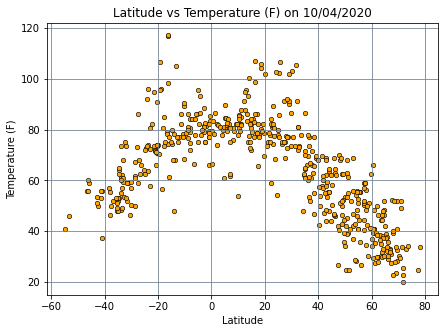

In [15]:
clean_city_data.head()
fig = clean_city_data.plot.scatter(x='lat', y='Temperature (F)', color='orange', edgecolor='black', linewidth=.6, figsize=(7,5))
plt.grid(axis='both', color='slategray')
plt.title(f'Latitude vs Temperature (F) on {today}')
plt.xlabel('Latitude')
plt.savefig("lat_vs_temp.png")
plt.show()

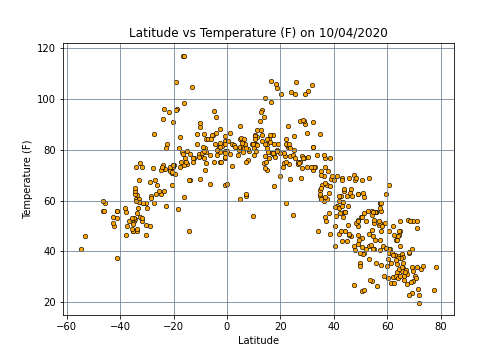

In [16]:
Image(filename='lat_vs_temp.png', width=700, height=300)

### Latitude vs. Humidity Plot

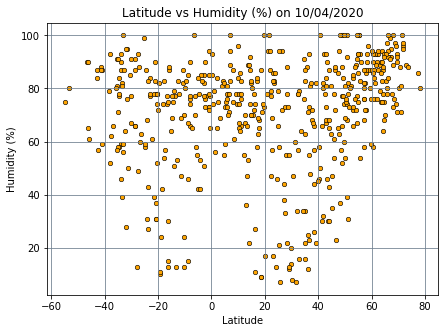

In [17]:
clean_city_data.plot.scatter(x='lat', y='Humidity (%)',color='orange', edgecolor='black', linewidth=.6, figsize=(7,5))
plt.grid(axis='both', color='slategray')
plt.title(f'Latitude vs Humidity (%) on {today}')
plt.xlabel('Latitude')
plt.savefig("lat_vs_humid.png")
plt.show()

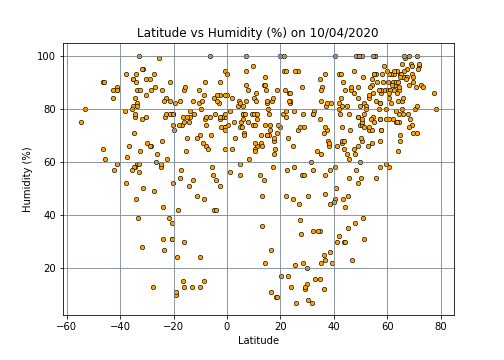

In [18]:
Image(filename='lat_vs_humid.png', width=700, height=300)

### Latitude vs. Cloudiness Plot

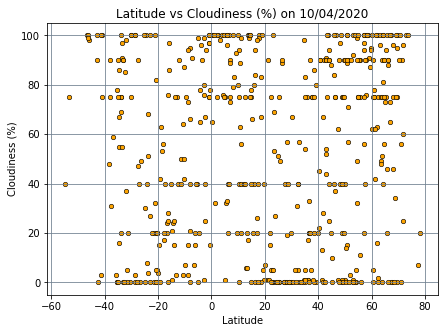

In [19]:
clean_city_data.plot.scatter(x='lat', y='Cloudiness (%)', color='orange', edgecolor='black', linewidth=.6, figsize=(7,5))
plt.grid(axis='both', color='slategray')
plt.title(f'Latitude vs Cloudiness (%) on {today}')
plt.xlabel('Latitude')
plt.savefig("lat_vs_cloud.png")
plt.show()

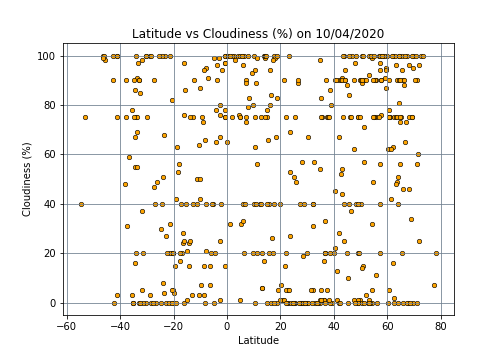

In [20]:
Image(filename='lat_vs_cloud.png', width=700, height=300)

### Latitude vs. Wind Speed Plot

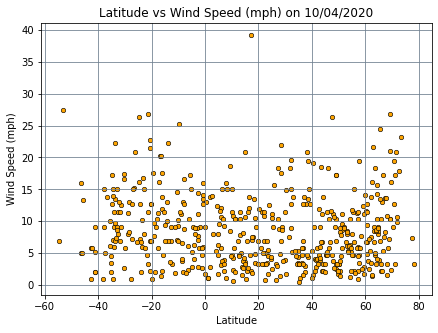

In [21]:
clean_city_data.plot.scatter(x='lat', y='Wind Speed (mph)', color='orange', edgecolor='black', linewidth=.6, figsize=(7,5))
plt.grid(axis='both', color='slategray')
plt.title(f'Latitude vs Wind Speed (mph) on {today}')
plt.xlabel('Latitude')
plt.savefig("lat_vs_wind.png")
plt.show()

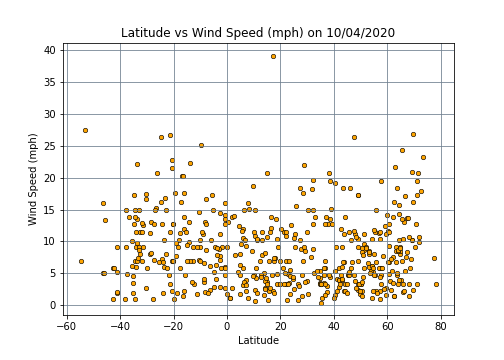

In [22]:
Image(filename='lat_vs_wind.png', width=700, height=300)

## Linear Regression

In [23]:
north_hem = clean_city_data.loc[clean_city_data['lat']>=0]
south_hem = clean_city_data.loc[clean_city_data['lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8419086117734265


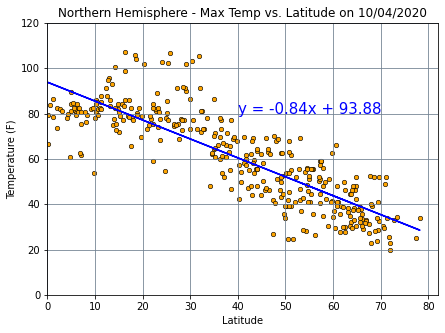

In [24]:
temp = north_hem['Temperature (F)']
lat = north_hem['lat']
slope, inter, r, p, std_err = sts.linregress(lat, temp)
fit = slope * lat + inter
line_eq = (f"y = {round(slope,2)}x + {round(inter,2)}")

north_hem.plot.scatter(x='lat', y='Temperature (F)',  color='orange', edgecolor='black', linewidth=.6, figsize=(7,5))
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude on {today}')
plt.grid(axis='both', color='slategray')
plt.xlabel('Latitude')
plt.xlim(0,82)
plt.ylim(0,120)
plt.annotate(line_eq,(40,80),fontsize=15,color="blue")
plt.plot(lat, fit,"-", color='blue')
print(f'The r-value is: {r}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6991609813694967


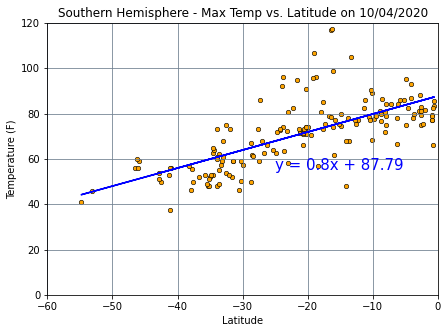

In [25]:
temp = south_hem['Temperature (F)']
lat = south_hem['lat']
slope, inter, r, p, std_err = sts.linregress(lat, temp)
fit = slope * lat + inter
line_eq = (f"y = {round(slope,2)}x + {round(inter,2)}")

south_hem.plot.scatter(x='lat', y='Temperature (F)', color='orange', edgecolor='black', linewidth=.6, figsize=(7,5))
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude on {today}')
plt.grid(axis='both', color='slategray')
plt.plot(lat, fit,"-", color='blue')
plt.annotate(line_eq,(-25,55),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.xlim(-60,0)
plt.ylim(0,120)
print(f'The r-value is: {r}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27148322968584054


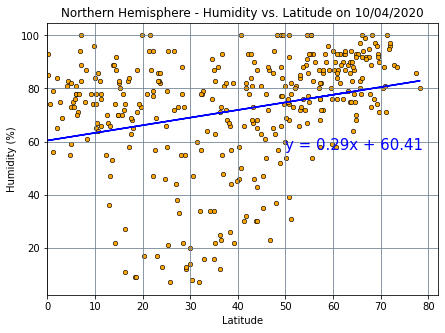

In [26]:
humid = north_hem['Humidity (%)']
lat = north_hem['lat']
slope, inter, r, p, std_err = sts.linregress(lat, humid)
fit = slope * lat + inter
line_eq = (f"y = {round(slope,2)}x + {round(inter,2)}")

north_hem.plot.scatter(x='lat', y='Humidity (%)',color='orange', edgecolor='black', linewidth=.6, figsize=(7,5))
plt.title(f'Northern Hemisphere - Humidity vs. Latitude on {today}')
plt.plot(lat, fit,"-", color='blue')
plt.grid(axis='both', color='slategray')
plt.xlabel('Latitude')
plt.xlim(0,82)
plt.annotate(line_eq,(50,57),fontsize=15,color="blue")
print(f'The r-value is: {r}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.09915666262096996


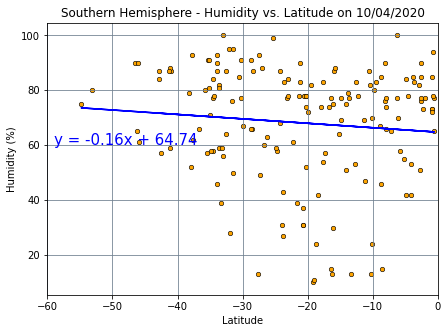

In [27]:
humid = south_hem['Humidity (%)']
lat = south_hem['lat']
slope, inter, r, p, std_err = sts.linregress(lat, humid)
fit = slope * lat + inter
line_eq = (f"y = {round(slope,2)}x + {round(inter,2)}")

south_hem.plot.scatter(x='lat', y='Humidity (%)', color='orange', edgecolor='black', linewidth=.6, figsize=(7,5))
plt.title(f'Southern Hemisphere - Humidity vs. Latitude on {today}')
plt.plot(lat, fit,"-", color='blue')
plt.grid(axis='both', color='slategray')
plt.annotate(line_eq,(-59,60),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.xlim(-60,0)
print(f'The r-value is: {r}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08442523283420215


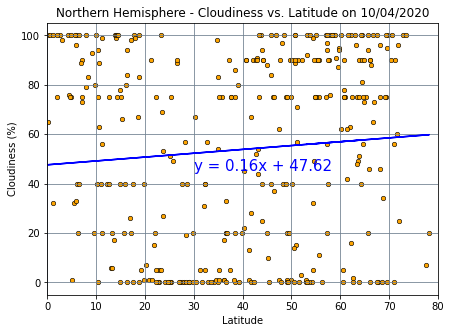

In [28]:
cloud = north_hem['Cloudiness (%)']
lat = north_hem['lat']
slope, inter, r, p, std_err = sts.linregress(lat, cloud)
fit = slope * lat + inter
line_eq = (f"y = {round(slope,2)}x + {round(inter,2)}")

north_hem.plot.scatter(x='lat', y='Cloudiness (%)', color='orange', edgecolor='black', linewidth=.6, figsize=(7,5))
plt.title(f'Northern Hemisphere - Cloudiness vs. Latitude on {today}')
plt.plot(lat, fit,"-", color='blue')
plt.grid(axis='both', color='slategray')
plt.xlabel('Latitude')
plt.xlim(0,80)
plt.annotate(line_eq,(30,45),fontsize=15,color="blue")
print(f'The r-value is: {r}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.06472345897966358


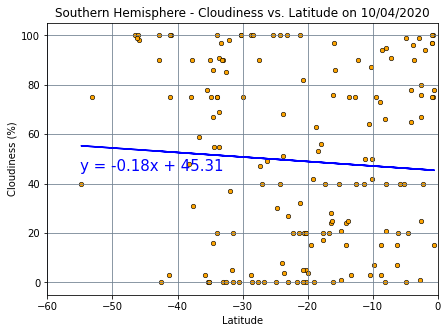

In [29]:
cloud = south_hem['Cloudiness (%)']
lat = south_hem['lat']
slope, inter, r, p, std_err = sts.linregress(lat, cloud)
fit = slope * lat + inter
line_eq = (f"y = {round(slope,2)}x + {round(inter,2)}")

south_hem.plot.scatter(x='lat', y='Cloudiness (%)', color='orange', edgecolor='black', linewidth=.6, figsize=(7,5))
plt.title(f'Southern Hemisphere - Cloudiness vs. Latitude on {today}')
plt.plot(lat, fit,"-", color='blue')
plt.grid(axis='both', color='slategray')
plt.xlabel('Latitude')
plt.xlim(-60,0)
plt.annotate(line_eq,(-55,45),fontsize=15,color="blue")
print(f'The r-value is: {r}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10579282314659685


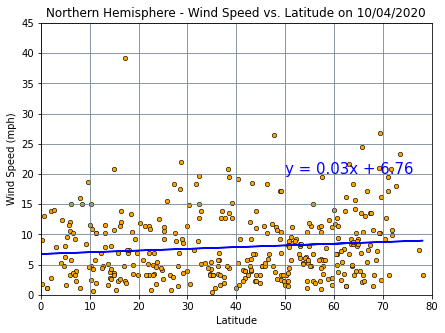

In [30]:
wind = north_hem['Wind Speed (mph)']
lat = north_hem['lat']
slope, inter, r, p, std_err = sts.linregress(lat, wind)
fit = slope * lat + inter
line_eq = (f"y = {round(slope,2)}x + {round(inter,2)}")

north_hem.plot.scatter(x='lat', y='Wind Speed (mph)', color='orange', edgecolor='black', linewidth=.6, figsize=(7,5))
plt.title(f'Northern Hemisphere - Wind Speed vs. Latitude on {today}')
plt.plot(lat, fit,"-", color='blue')
plt.grid(axis='both', color='slategray')
plt.xlabel('Latitude')
plt.xlim(0,80)
plt.ylim(0,45)
plt.annotate(line_eq,(50,20),fontsize=15,color="blue")
print(f'The r-value is: {r}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.039723950132768804


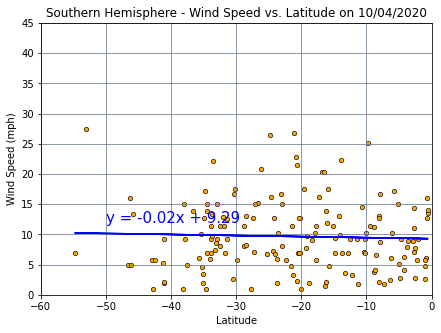

In [31]:
wind = south_hem['Wind Speed (mph)']
lat = south_hem['lat']
slope, inter, r, p, std_err = sts.linregress(lat, wind)
fit = slope * lat + inter
line_eq = (f"y = {round(slope,2)}x + {round(inter,2)}")

south_hem.plot.scatter(x='lat', y='Wind Speed (mph)', color='orange', edgecolor='black', linewidth=.6, figsize=(7,5))
plt.title(f'Southern Hemisphere - Wind Speed vs. Latitude on {today}')
plt.plot(lat, fit,"-", color='blue')
plt.grid(axis='both', color='slategray')
plt.xlabel('Latitude')
plt.xlim(-60,0)
plt.ylim(0,45)
plt.annotate(line_eq,(-50,12),fontsize=15,color="blue")
print(f'The r-value is: {r}')
plt.show()

## Observations

1. General assumption is that the temperature increases as you approach te equator (latitude = 0).
2. There is a slight decrease in cloudiness as you move closer to the equator.
3. It's more apparent in the northern hemisphere but it can be observed that humidity increases as you move closer to the equator.
